In [ ]:
from tensorflow import keras
import tensorflow as tf

fash_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fash_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
import numpy as np


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
                          ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7791 - loss: 0.6345
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8618 - loss: 0.3871
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8734 - loss: 0.3484
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8834 - loss: 0.3184
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8946 - loss: 0.2926
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8977 - loss: 0.2797
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9029 - loss: 0.2638
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9030 - loss: 0.2617
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9081 - loss: 0.2435
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9120 - loss: 0.2348


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8809 - loss: 0.3360
0.8816999793052673


In [ ]:
import numpy as np
predictions = model.predict(test_images)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 10)

In [ ]:
predictions
np.argmax(predictions[0])

9

In [ ]:
import numpy as np
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([9, 2, 1, ..., 8, 1, 5])

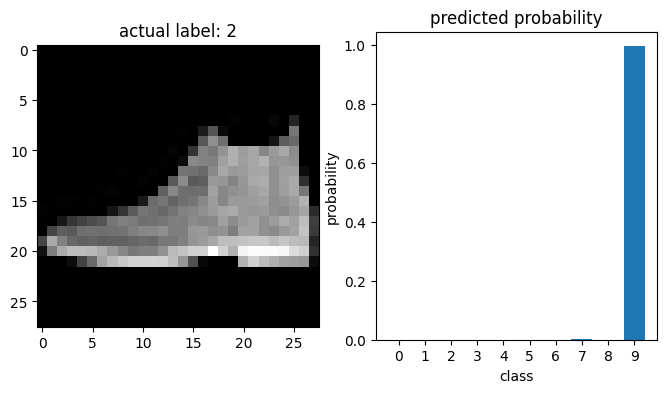

predicted label: 9


In [ ]:
import matplotlib.pyplot as plt
prediction=predictions[0]
predicted_label=np.argmax(prediction)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(test_images[0], cmap='gray')
plt.title(f'actual label: {test_labels[1]}')
plt.subplot(1,2,2)
plt.bar(range(10), prediction)
plt.xticks(range(10))
plt.xlabel('class')
plt.ylabel('probability')
plt.title('predicted probability')
plt.show()
print(f'predicted label: {predicted_label}')